# Linear Regression

---

## 1. Introduction 
Linear Regession with Fabricated data
- y : target
- x : 
- G: 
- x1:
- x2:
- x3

In [6]:
!pip install numpy

In [7]:
!pip install pandas

In [8]:
!pip install matplotlib

In [9]:
!pip install seaborn

## 2. Import the required libraries

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## 3. Load Data

In [11]:
# Load data
train_data = pd.read_csv('data/myfile.csv')
# Separate features and target variable
#X_train = train_data.drop(['SalePrice'], axis=1)
y = train_data['y']

In [12]:
train_data

,G,x,y,x2,x3,x4
0,F,NaN,2.393314e+03,17075.115922,-8521.801072,-43177.354927
1,F,598.0,1.000002e+09,-20959.442965,23558.726889,39994.459715
2,M,138.0,4.239385e+02,-1554.930015,5724.977460,66341.765179
3,F,664.0,2.011673e+03,-5135.895368,52338.091782,-16928.910574
4,M,375.0,1.135073e+03,158.475468,717.122450,-13250.407033
...,...,...,...,...,...,...
1995,M,615.0,1.855284e+03,10993.076806,-61587.390437,17052.096100
1996,M,253.0,7.692267e+02,-13878.167369,-1137.067817,86493.650507
1997,F,602.0,1.826424e+03,-11559.254497,-69553.012391,-6197.085481
1998,F,185.0,5.751520e+02,-4625.828583,3147.081554,-56708.896197


## 4. Exploratory Data Analysis / Analysis / Pre-Processing

**What are the Data Types of the Features ?**

In [13]:
print("What are the Data Types of the Features ?")
print(train_data.info())

What are the Data Types of the Features ?
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       2000 non-null   object 
 1   x       1999 non-null   float64
 2   y       1999 non-null   float64
 3   x2      1999 non-null   float64
 4   x3      1999 non-null   float64
 5   x4      1999 non-null   float64
dtypes: float64(5), object(1)
memory usage: 93.9+ KB
None


**Plots :**

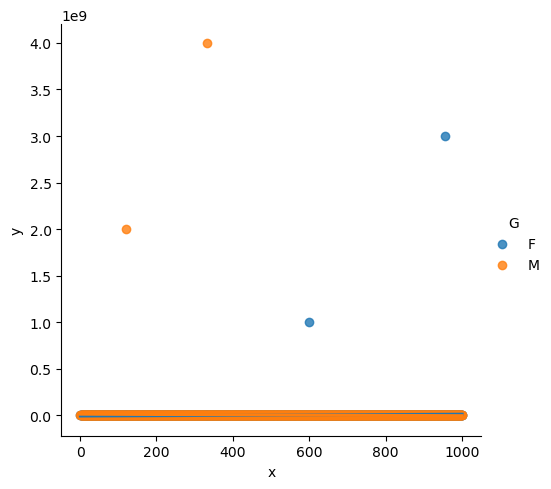

In [14]:
sns.lmplot(x='x', y="y", hue='G', data=train_data)

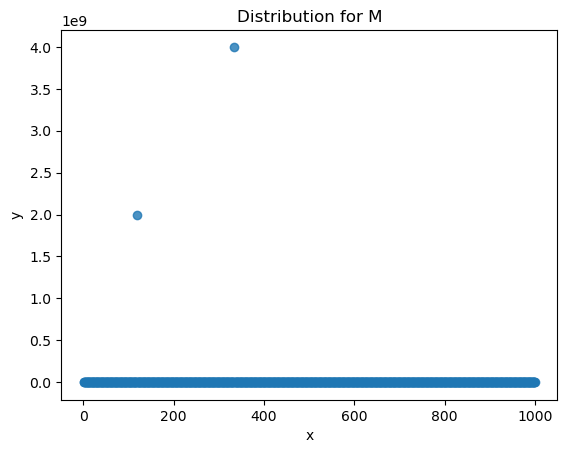

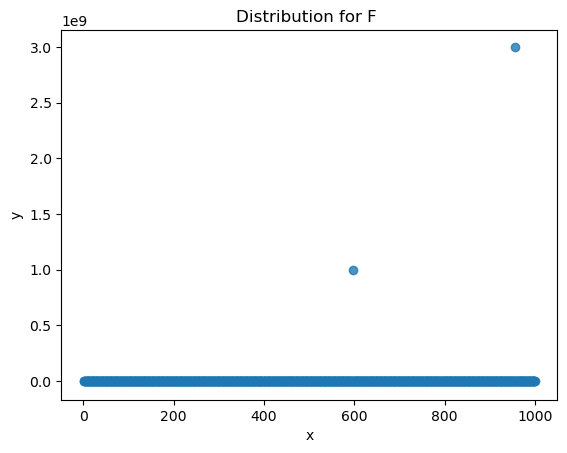

In [15]:
X = train_data
X_m = X.loc[X['G']=="M"]
X_f = X.loc[X['G']=="F"]
sns.regplot(x=X_m['x'],y=X_m['y'])
plt.title("Distribution for M")
plt.show()
plt.title("Distribution for F ")
sns.regplot(x=X_f['x'],y=X_f['y'])
plt.show()

**Is there any missing values ?**

In [16]:
#check if null values is present in dataset or not.....
train_data.isnull().sum()

G     0
x     1
y     1
x2    1
x3    1
x4    1
dtype: int64

**Let's drop the missing values :**

In [17]:
train_data = train_data.dropna() 

In [18]:
#check if null values is present in dataset or not.....
train_data.isnull().sum()

G     0
x     0
y     0
x2    0
x3    0
x4    0
dtype: int64

**Is there Any Outliers in the `y` Target ?**

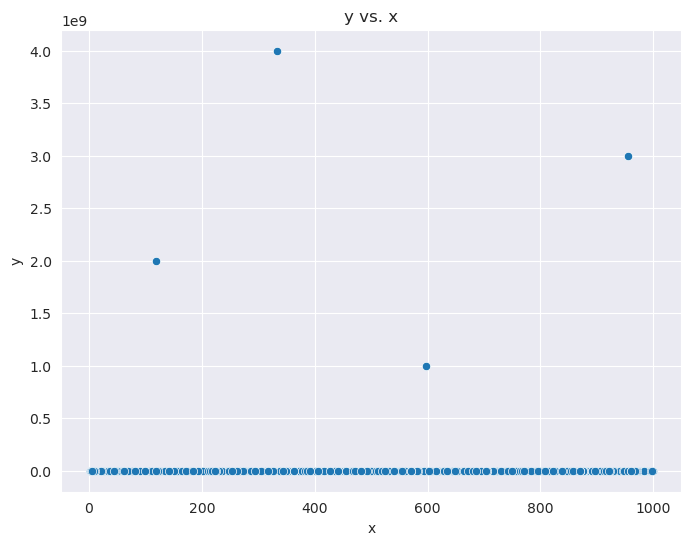

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=train_data)
title = plt.title('y vs. x')

**Drop the outliers :**

In [20]:
#outlier_index = train_data[(train_data.x < 400) & (train_data.y < 200 * 1000000000)].index
outlier_index = train_data[(train_data.y > 1 * 1000000000)].index

train_data.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)

/tmp/ipykernel_68054/3205229919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(outlier_index, axis=0, inplace=True)


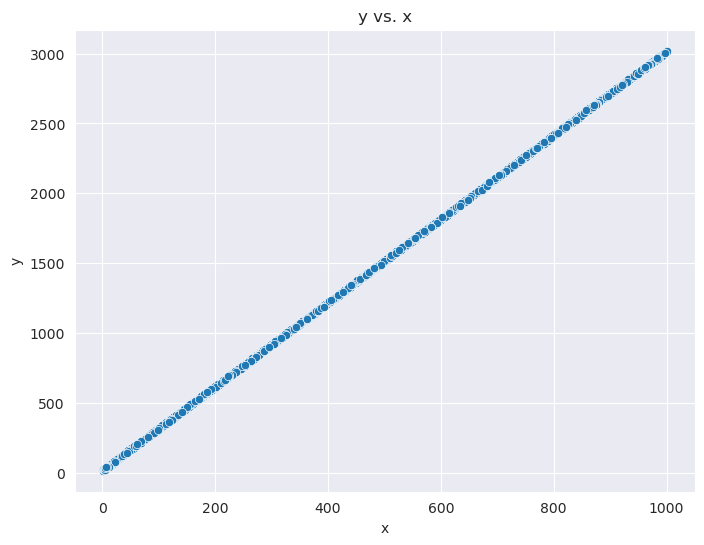

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=train_data)
title = plt.title('y vs. x')

In [22]:
train_data.isnull().sum()

G     0
x     0
y     0
x2    0
x3    0
x4    0
dtype: int64

**Display the top features most correlated with `y` :**

In [23]:
# Calculate the correlation of all features with 'y'
correlations = train_data.corr(numeric_only=True)['y'].sort_values(ascending=False)
# Display the top features most correlated with 'SalePrice'
top_correlations = correlations[1:11]
print(top_correlations)

x     0.999983
x4    0.020772
x3   -0.012502
x2   -0.017567
Name: y, dtype: float64


**Scatter Plot :**

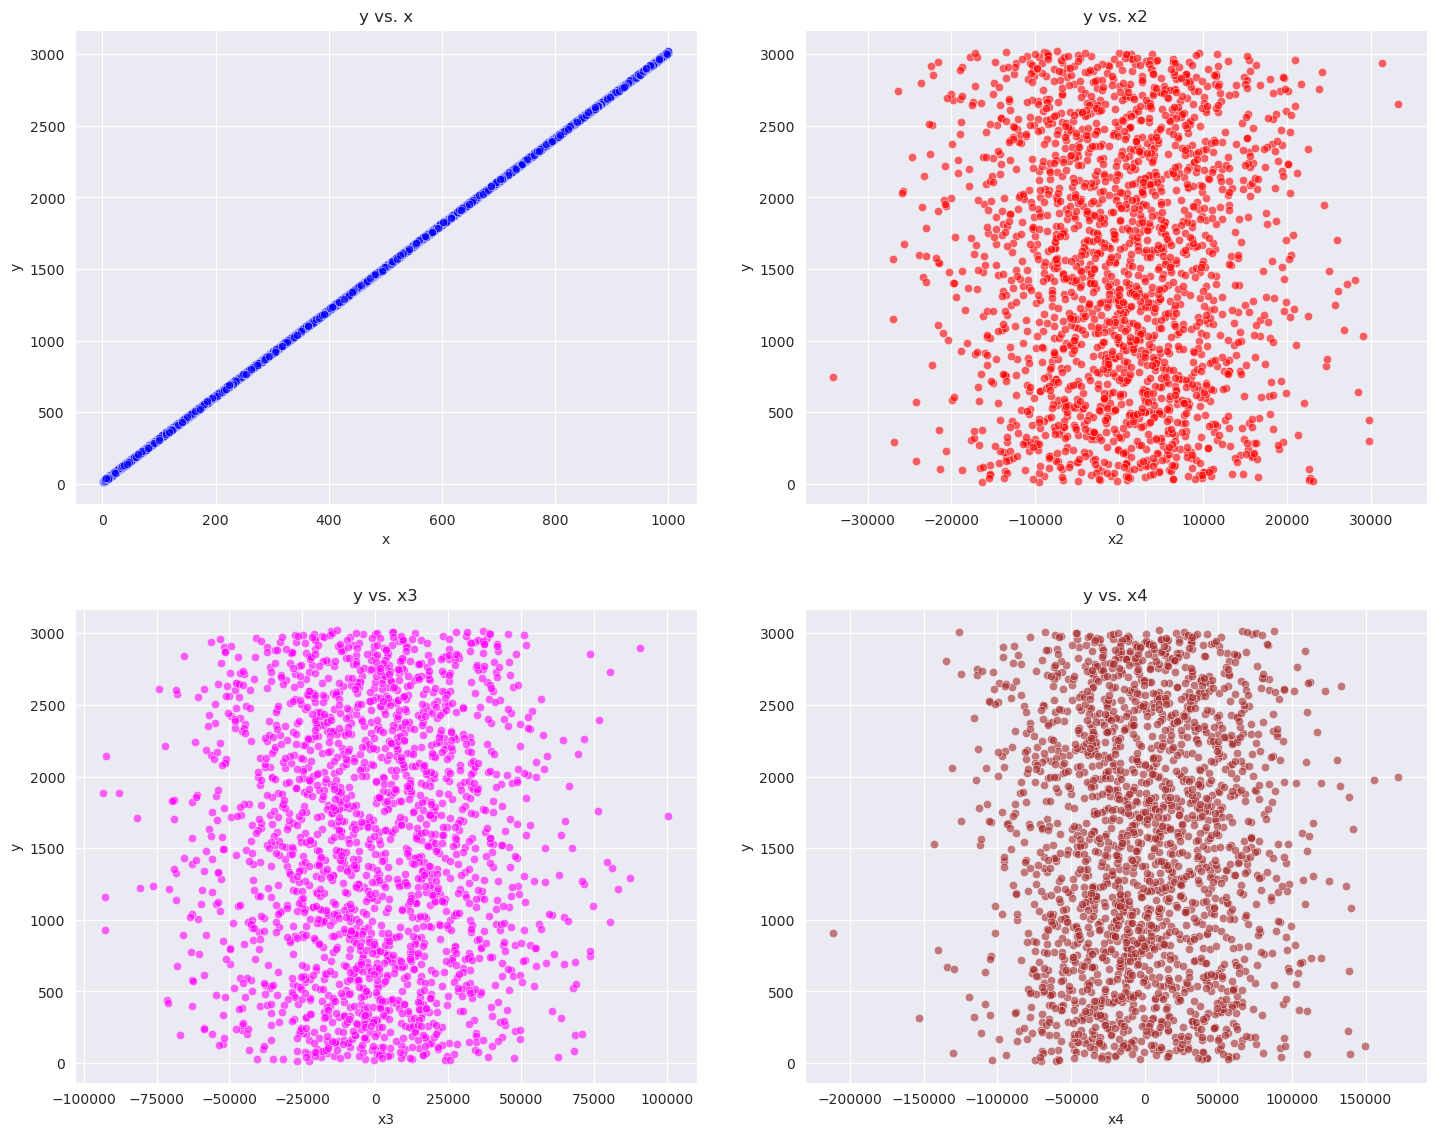

In [24]:
# Setting up the figure and axes
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Scatter plot for y vs. x
sns.scatterplot(x=train_data['x'], y=train_data['y'], ax=ax[0, 0], color='blue', alpha=0.6)
ax[0, 0].set_title('y vs. x')
ax[0, 0].set_ylabel('y')
ax[0, 0].set_xlabel('x')

# Scatter plot for y vs. x2
sns.scatterplot(x=train_data['x2'], y=train_data['y'], ax=ax[0, 1], color='red', alpha=0.6)
ax[0, 1].set_title('y vs. x2')
ax[0, 1].set_ylabel('y')
ax[0, 1].set_xlabel('x2')

# Scatter plot for y vs. x3
sns.scatterplot(x=train_data['x3'], y=train_data['y'], ax=ax[1, 0], color='magenta', alpha=0.6)
ax[1, 0].set_title('y vs. x3')
ax[1, 0].set_ylabel('y')
ax[1, 0].set_xlabel('x3')

# Scatter plot for y vs. x4
sns.scatterplot(x=train_data['x4'], y=train_data['y'], ax=ax[1, 1], color='brown', alpha=0.6)
ax[1, 1].set_title('y vs. x4')
ax[1, 1].set_ylabel('y')
ax[1, 1].set_xlabel('x4')


# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

**Plots - before training :**

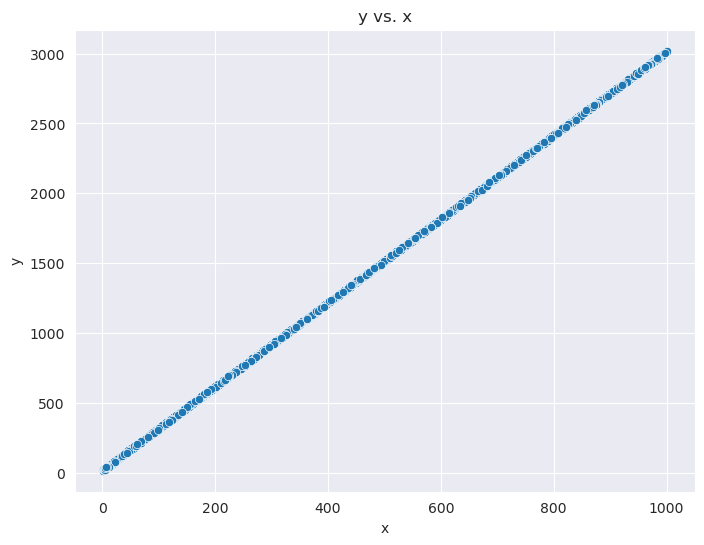

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=train_data)
title = plt.title('y vs. x')

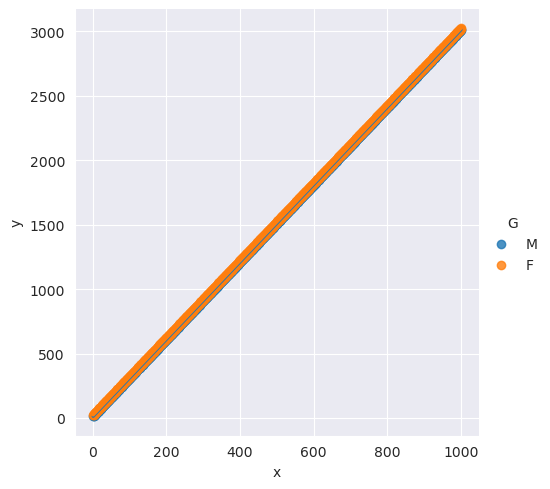

In [26]:
sns.lmplot(x='x', y="y", hue='G', data=train_data)

## 5. Feature Engineering

In [27]:
train_data.isnull().sum()

G     0
x     0
y     0
x2    0
x3    0
x4    0
dtype: int64

In [28]:
train_data_encoded = pd.get_dummies(train_data, columns=['G', ])
train_data_encoded

,x,y,x2,x3,x4,G_F,G_M
2,138.0,423.938506,-1554.930015,5724.977460,66341.765179,False,True
3,664.0,2011.672969,-5135.895368,52338.091782,-16928.910574,True,False
4,375.0,1135.072607,158.475468,717.122450,-13250.407033,False,True
5,133.0,409.139862,-5352.937974,-26425.492073,-46984.708514,False,True
6,104.0,322.054252,4367.493882,-12323.536488,15759.525665,False,True
...,...,...,...,...,...,...,...
1995,615.0,1855.283816,10993.076806,-61587.390437,17052.096100,False,True
1996,253.0,769.226707,-13878.167369,-1137.067817,86493.650507,False,True
1997,602.0,1826.424219,-11559.254497,-69553.012391,-6197.085481,True,False
1998,185.0,575.152016,-4625.828583,3147.081554,-56708.896197,True,False


## 6. Linear Regression
**Preparing Some tools :**

**Evaluate the model using Most Common Regression metrics :**

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

**Mean Absolute Error (MAE) :** 
\begin{align*} 
MAE = \frac{1}{n} \Sigma_{i=1}^n |{y}-\hat{y}|
\end{align*}


**Residual Sum of Squares (RSS) :** 

\begin{align*} 
 RSS = \Sigma_{i=1}^n({y}-\hat{y})^2
\end{align*}

**Mean Squared Error (MSE) :** 
\begin{align*} 
  MSE = \frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2
\end{align*}


**Root Mean Squared Error (RMSE) :** 
\begin{align*} 
  RMSE = \sqrt {\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2 }
\end{align*}


* Comparing these metrics :
    * **MAE** is the easiest to understand, because it is the average error
    * **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world
    * **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units
* All of these are **loss functions**, because we want to minimize them

**R^2 :** 
* aka : coefficient of determination
* if the model is only prdicting the mean of the targets, R^2 value would be 0
  ==> model is poor
* if the model is perfectly predicting the targets, R^2 value would be 1

In [29]:
!pip install scikit-learn

In [30]:
# Create evaluation functions 
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Create function to get metrics from predicted values vs true values
def get_scores(predictions, y):
    """
    Caculates between predictions and true labels: 
        - mae,
        - mse,
        - rmse
        - r2
    """
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = explained_variance_score(y, predictions)
    scores = {"MAE": mae,
              "MSE": mse,
              "RMSE": rmse,
              "R2": r2
              }
    return scores

def show_scores(scores):
    """
    Shows metrics: 
        - mae,
        - mse,
        - rmse
        - r2
    """
    print(f"\tR^2 : {scores['R2']:.2f}")
    print(f"\tMAE : {scores['MAE']:.2f}")
    print(f"\tMSE : {scores['MSE']:.2f}")
    print(f"\tRMSE : {scores['RMSE']:.2f}")
    print('')

def show_scores_data_frame(scores, col_name):
    """
    Shows metrics in a data frame: 
        - mae,
        - mse,
        - rmse
        - r2
    """
    df = pd.DataFrame(scores.values(), scores.keys(), columns=[col_name])
    print(df)

def show_intercept_coefs(lr, cols):
    print(f"Intercept b_0 : {lr.intercept_}")
    print('')
    cdf = pd.DataFrame(lr.coef_, cols, columns=['Coefficient'])
    cdf = cdf.sort_values(by=['Coefficient'], ascending=False)
    print(cdf)   

## 7. Modeling (I)

**Splitting Dataset into the Training Set and Validation Set :**

**Simple Linear Regression :**
* Trying to find the `coefficient` and the `slope` for :
\begin{align*}
\\
\hat{y} = b_0 + b_1{x}_{1} +b_2{G_F}
\end{align*}

In [31]:
train_data_encoded.shape

(1991, 7)

In [32]:
X = pd.DataFrame(train_data_encoded[['x', 'G_F']])
y = train_data_encoded['y']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Making Predictions on `X_train` and `X_val` :**

In [34]:
train_predictions = lr.predict(X_train)
val_predictions = lr.predict(X_val)

train_scores = get_scores(train_predictions, y_train)
val_scores = get_scores(val_predictions, y_val)

print('')
#print(f"Training :")
#show_scores(train_scores)
show_scores_data_frame(train_scores, 'Training')
print('')
#print(f"Validation :")
#show_scores(val_scores)
show_scores_data_frame(val_scores, 'Validation')
#
print('')

show_intercept_coefs(lr, X_train.columns)


      Training
MAE   0.239387
MSE   0.090415
RMSE  0.300690
R2    1.000000

      Validation
MAE     0.221634
MSE     0.078210
RMSE    0.279661
R2      1.000000

Intercept b_0 : 10.004534009909548

     Coefficient
G_F     9.982847
x       3.000034


* Trying to find the `coefficient` and the `slope` for :
\begin{align*}
\hat{y} = b_0 + b_1{x}_{1} + b_2{G_F}
\end{align*}

  $$\hat{y} = 9.97 + 3.00 * {x}_{1} + 10.00{G_F}$$

**R^2 (default score): Each model has a default metric set up by default :**

In [35]:
r_2_on_train = lr.score(X_train, y_train) 
print(f"R^2 on Training data = {r_2_on_train}")
r_2_on_val = lr.score(X_val, y_val) 
print(f"R^2 on Validation data = {r_2_on_val}")

R^2 on Training data = 0.9999998801266112
R^2 on Validation data = 0.9999998935385519


**Plot Predicted values vs True Values :**

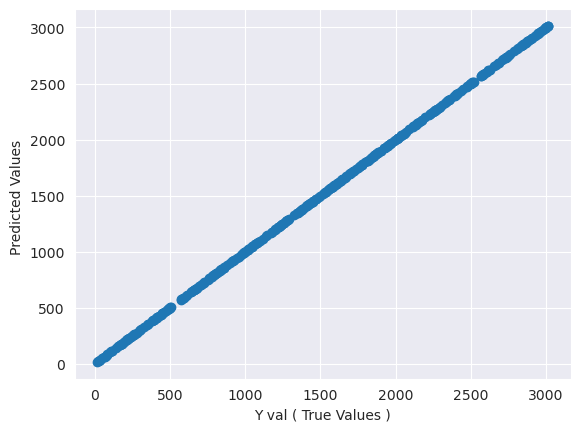

In [36]:
plt.scatter(y_val, val_predictions)
plt.xlabel('Y val ( True Values )')
plt.ylabel('Predicted Values ')
plt.show()

In [37]:
# Example of predicting a single value using a new data point
new_data = np.array([[20, 1]])  # Example values for x1 and x2
single_prediction = lr.predict(new_data)
print(f"Predicted value for the new data point {new_data[0]}: {single_prediction[0]}")

Predicted value for the new data point [20  1]: 79.98806534885168


/home/aaiche/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Saving and Loading Models in Scikit-learn :**
- Scikit-learn supports the Python packages :
  * `Pickle` ( not covered in student guide )
  * `Joblib`

In [38]:
import pickle

# save the model as a pickle file
model_pkl_file = "models/lr1.pkl"  


with open(model_pkl_file, 'wb') as file:  
    pickle.dump(lr, file)

In [39]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:  
    loaded_model = pickle.load(file)

In [40]:
# Example of predicting a single value using a new data point
new_data = np.array([[20, 1]])  # Example values for x1 and x2
single_prediction = lr.predict(new_data)
print(f"Predicted value for the new data point {new_data[0]}: {single_prediction[0]}")

Predicted value for the new data point [20  1]: 79.98806534885168


/home/aaiche/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 8. Modeling (II)

**Multiple Linear Regression :**
* Trying to find the `coefficient` and the `slope` for :
\begin{align*}
\hat{y} = b_0 + b_1{x}_{1} + b_2{x}_{2} + ... + b_n{x}_{n}\\
\end{align*}

In [41]:
train_data_encoded.shape

(1991, 7)

In [42]:
X = pd.DataFrame(train_data_encoded[['x', 'x2', 'x3', 'x4', 'G_F']])
y = train_data_encoded['y']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Making Predictions on `X_train` and `X_val` : **

In [44]:
train_predictions = lr.predict(X_train)
val_predictions = lr.predict(X_val)

train_scores = get_scores(train_predictions, y_train)
val_scores = get_scores(val_predictions, y_val)

print('')
#print(f"Training :")
#show_scores(train_scores)
show_scores_data_frame(train_scores, 'Training')
print('')
#print(f"Validation :")
#show_scores(val_scores)
show_scores_data_frame(val_scores, 'Validation')
#
print('')

show_intercept_coefs(lr, X_train.columns)


      Training
MAE   0.239128
MSE   0.090305
RMSE  0.300508
R2    1.000000

      Validation
MAE     0.220865
MSE     0.077848
RMSE    0.279012
R2      1.000000

Intercept b_0 : 10.003201783669965

      Coefficient
G_F  9.983438e+00
x    3.000036e+00
x2   3.737132e-07
x3   1.309538e-07
x4  -1.769128e-07


* Trying to find the `coefficient` and the `slope` for :
\begin{align*}
\hat{y} = b_0 + b_1{x}_{1} + b_2{x}_{2} + ... + b_n{x}_{n}\\
\end{align*}

  $$\hat{y} = 9.97 + 3.00 * {x}_{1} + -1.03e-06 * {x}_{2} + 6.27e-09 * {x}_{3} + 1.06e-07 * {x}_{4}$$

**R^2 (default score): Each model has a default metric set up by default :**

In [45]:
r_2_on_train = lr.score(X_train, y_train) 
print(f"R^2 on Training data = {r_2_on_train}")
r_2_on_val = lr.score(X_val, y_val) 
print(f"R^2 on Validation data = {r_2_on_val}")

R^2 on Training data = 0.9999998802716278
R^2 on Validation data = 0.9999998940318439


**Plot Predicted values vs True Values :**

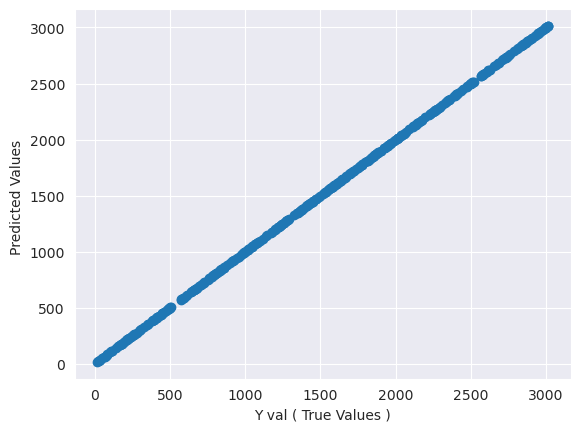

In [46]:
plt.scatter(y_val, val_predictions)
plt.xlabel('Y val ( True Values )')
plt.ylabel('Predicted Values ')
plt.show()

In [47]:
# Example of predicting a single value using a new data point
new_data = np.array([[20, 2222222, 3333333, 4444444, 1]]) 
single_prediction = lr.predict(new_data)
print(f"Predicted value for the new data point {new_data[0]}: {single_prediction[0]}")

Predicted value for the new data point [     20 2222222 3333333 4444444       1]: 80.46806726779407


/home/aaiche/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Saving and Loading Models in Scikit-learn :**
- Scikit-learn supports the Python packages :
  * `Pickle` ( not covered in student guide )
  * `Joblib`

In [48]:
import joblib 

# save model with joblib 
filename = 'models/lr2.joblib'
joblib.dump(lr, filename)

['models/lr2.joblib']

In [49]:
# load model with joblib
loaded_model = joblib.load(filename)

In [50]:
# Example of predicting a single value using a new data point
new_data = np.array([[20, 2222222, 3333333, 4444444, 1]]) 
single_prediction = loaded_model.predict(new_data)
print(f"Predicted value for the new data point {new_data[0]}: {single_prediction[0]}")

Predicted value for the new data point [     20 2222222 3333333 4444444       1]: 80.46806726779407


/home/aaiche/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Convert the Scikit-learn model to ONNX and save :**

In [51]:
#TBD